
ЛАБОРАТОРНАЯ РАБОТА 4. ЛОГИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ
Цель лабораторной работы: изучение принципов построения информационных систем с использованием логических методов классификации.
Основные задачи:
- освоение технологии внедрения алгоритмов на онове решающих списков в приложения;
- освоение технологии внедрения алгоритмов на онове решающих деревьев в приложения;
- изучение параметров логической классификации;
- освоение модификаций логических методов классификации.

In [ ]:
import pandas as pd
from google.colab import files

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
uploaded = files.upload()

Saving iris.data to iris.data


In [ ]:
%matplotlib inline
data_source = 'iris.data'
d = pd.read_table(data_source, delimiter=',', header=None,
names=['sepal_length','sepal_width',
'petal_length', 'petal_width','answer'])
# Содержит только первые четыре столбца (индексы 0, 1, 2 и 3)
dX = d.iloc[ : , 0:4 ]
# Сохраняет целевую переменную
dy = d['answer']
print(dX.head())
print(dy.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: answer, dtype: object


2. Для построения дерева классификации воспользуемся
специальным классом sklearn.tree.DecisionTreeClassifier. Оценими точность
модели методом hold-out (рис. 4.2). Следует обратить внимание, что если в
методе ближайших соседей производилась оптимизация по одному параметру
K – количеству ближайших соседей, то при создании модели
DecisionTreeClassifier необходимо указать два параметра: максимальную
глубину дерева (max_depth) и количество признаков разделения дерева
(max_features).**

In [ ]:
# Класс для построения классификатора на основе решения дерева (decision tree)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
# Функция для вычисления точности классификатора,
# т.е. насколько правильно классификатор предсказал метки для тестовых данных.
from sklearn.metrics import accuracy_score

#Подмножества для hold-out
X_train, X_holdout, y_train, y_holdout = \
train_test_split(dX, dy, test_size=0.3, random_state=12)

# Обучение модели
# Создание экземпляра классификатора на основе дерева решений с параметрами
tree = DecisionTreeClassifier(max_depth=5,
random_state=21,
max_features=2)
tree.fit(X_train, y_train)
#Получение оценки hold-out
tree_pred = tree.predict(X_holdout)
accur = accuracy_score(y_holdout, tree_pred)
print(accur)

0.9777777777777777


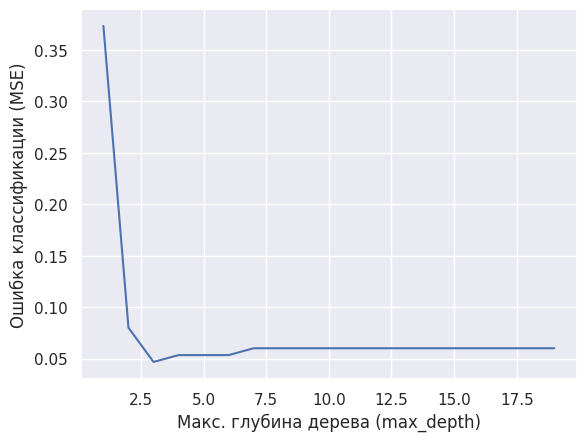

Оптимальные значения max_depth:  [3]


In [ ]:
from sklearn.model_selection import cross_val_score
#Значения параметра max_depth
d_list = list(range(1,20))
# Пустой список для хранения значений точности
cv_scores = []
# В цикле проходим все значения К
for d in d_list:
  tree = DecisionTreeClassifier(max_depth=d,
                            random_state=21,
                            max_features=2)
  scores = cross_val_score(tree, dX, dy, cv=10, scoring='accuracy')
  cv_scores.append(scores.mean())
# Вычисляем ошибку (misclassification error)
MSE = [1-x for x in cv_scores]
# Строим график
plt.plot(d_list, MSE)
plt.xlabel('Макс. глубина дерева (max_depth)');
plt.ylabel('Ошибка классификации (MSE)')
plt.show()

# Ищем минимум
d_min = min(MSE)

# Пробуем найти прочие минимумы (если их несколько)
all_d_min = []
for i in range(len(MSE)):
  if MSE[i] <= d_min:
      all_d_min.append(d_list[i])
# печатаем все К, оптимальные для модели
print('Оптимальные значения max_depth: ', all_d_min)

In [ ]:
# GridSearchCV — класс для нахождения оптимальных параметров для модели, перебирая все возможные комбинации в заданном диапазоне.
from sklearn.model_selection import GridSearchCV, cross_val_score
# Модуль, содержащий дерево решений
from sklearn import tree

# Создается классификатор дерева решений с фиксированными параметрами
# Но дальше подбор параметров будет проводиться через GridSearchCV
dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

# Это словарь, который задает диапазоны значений для двух гиперпараметров
tree_params = { 'max_depth': range(1,20), 'max_features': range(1,4) }
# GridSearchCV — выполняет перебор всех возможных комбинаций параметров, указанных в tree_params, и оценивает модель с каждым сочетанием через 10-кратную кросс-валидацию
tree_grid = GridSearchCV(dtc, tree_params, cv=10, verbose=True, n_jobs=-1)
# Обучение модели с использованием кросс-валидации
tree_grid.fit(dX, dy)

print('\n')
# Выводит параметры, которые дали наилучший результат при кросс-валидации
print('Лучшее сочетание параметров: ', tree_grid.best_params_)
# выводит наилучший результат (среднюю точность) кросс-валидации для оптимальных параметров.
print('Лучшие баллы cross validation: ', tree_grid.best_score_)

# Генерируем графическое представление дерева
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dy.unique(),
                     out_file='iris_tree.dot',
                     filled=True, rounded=True)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


Лучшее сочетание параметров:  {'max_depth': 2, 'max_features': 3}
Лучшие баллы cross validation:  0.9533333333333334


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Построим области решения для оптимального дерева
# max_features = 2, max_depth = 3
dtc = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
dtc.fit(dX, dy)
res = dtc.predict(pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=dX.columns))
print(res)


['Iris-setosa']


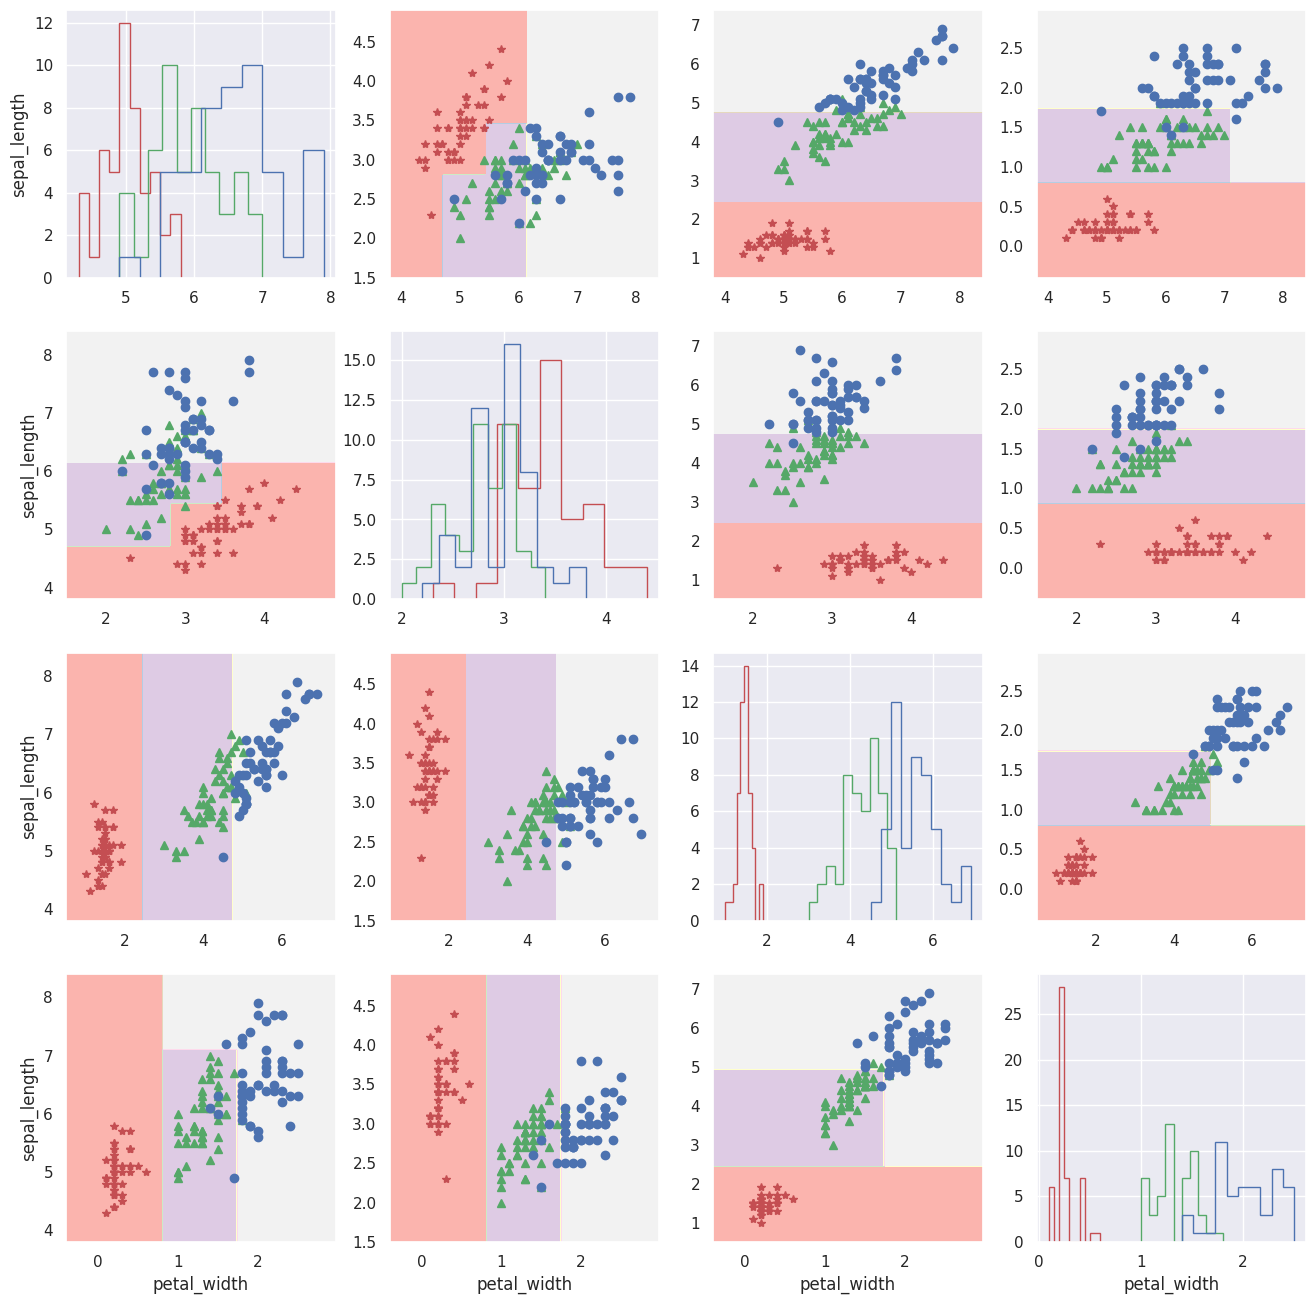

In [ ]:
# plot_markers — список маркеров для различных классов
plot_markers = ['r*', 'g^', 'bo']
# answers — уникальные значения целевой переменной dy
answers = dy.unique()

# Создаем подграфики для каждой пары признаков
# Создается сетка подграфиков 4x4, где каждый подграфик будет представлять собой график для пары признаков.
f, places = plt.subplots(4, 4, figsize=(16, 16))
# Определяются минимальные и максимальные значения признаков с небольшим запасом, чтобы графики не были сжаты.
fmin = dX.min() - 0.5
fmax = dX.max() + 0.5
# Шаг сетки для построения решающих границ модели.
plot_step = 0.02

# Перебираем все возможные пары признаков (всего 4 признака), и для каждой пары создаем подграфик.
for i in range(0, 4):
    for j in range(0, 4):

        # Строим решающие границы
        # Избегаем диагональных подграфиков, где переменные будут одинаковыми.
        if i != j:
          # Генерируем сетку точек для двух признаков, по которым мы хотим построить решающие границы.
            xx, yy = np.meshgrid(
                np.arange(fmin.iloc[i], fmax.iloc[i], plot_step),
                np.arange(fmin.iloc[j], fmax.iloc[j], plot_step)
            )
            # Создаем модель дерева решений с ограничением на максимальную глубину (max_depth=3) и ограничением на количество признаков для использования (max_features=2).
            model = DecisionTreeClassifier(max_depth=3, random_state=21, max_features=2)
            #  Обучаем дерево решений на данных, содержащих только два выбранных признака
            model.fit(dX.iloc[:, [i, j]], dy)

            # Создание DataFrame для предсказаний модели на сетке xx, yy с именами столбцов.
            # Создаем DataFrame для точек сетки, которые будут использоваться для предсказания.
            grid_points = pd.DataFrame(
                np.c_[xx.ravel(), yy.ravel()],
                columns=[dX.columns[i], dX.columns[j]]
            )
            # Предсказываем классы для каждой точки в сетке.
            p = model.predict(grid_points)

            # Преобразование классов в числовые значения
            p_numeric = np.zeros_like(p, dtype=int)
            for idx, label in enumerate(answers):
                p_numeric[p == label] = idx

            p_numeric = p_numeric.reshape(xx.shape)
            #  Рисуем контуры (решающие границы) для каждого подграфика, используя результат предсказания.
            places[i, j].contourf(xx, yy, p_numeric, cmap='Pastel1')

        # Обход всех классов (видов ириса)
        for id_answer in range(len(answers)):
          #  Находим индексы объектов, принадлежащих текущему классу.
            idx = np.where(dy == answers[id_answer])
            # Если текущие признаки совпадают (диагональные подграфики), рисуем гистограмму для каждого класса.
            if i == j:
                places[i, j].hist(
                    dX.iloc[idx].iloc[:, i],
                    color=plot_markers[id_answer][0],
                    histtype='step'
                )
                # Если признаки разные, рисуем точки для каждого класса на соответствующем подграфике с маркерами.
            else:
                places[i, j].plot(
                    dX.iloc[idx].iloc[:, i],
                    dX.iloc[idx].iloc[:, j],
                    plot_markers[id_answer],
                    label=answers[id_answer],
                    markersize=6
                )

        # Подписи осей
        if j == 0:
            places[i, j].set_ylabel(dX.columns[j]) # Подпись оси Y для текущего признака.
        if i == 3:
            places[i, j].set_xlabel(dX.columns[i]) # Подпись оси X для текущего признака.


Индивидуальное задание

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap



In [2]:
data = pd.read_csv("/content/breast-cancer-wisconsin-data_data.csv")
data.head()




,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Удаляем ненужные столбцы
data = data.drop(columns=["id", "Unnamed: 32"])

# Преобразуем целевую переменную 'diagnosis' в числовой формат
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # M = Malignant (1), B = Benign (0)

In [4]:
data.head() #на всякий случай проверяю как изменились данные

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Выбор признаков и целевой переменной
X = data.iloc[:, [1, 2]].values  # Берем первые два признака: radius_mean и texture_mean
y = data['diagnosis'].values

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
#  Обучение модели DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Параметр max_depth = 5
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

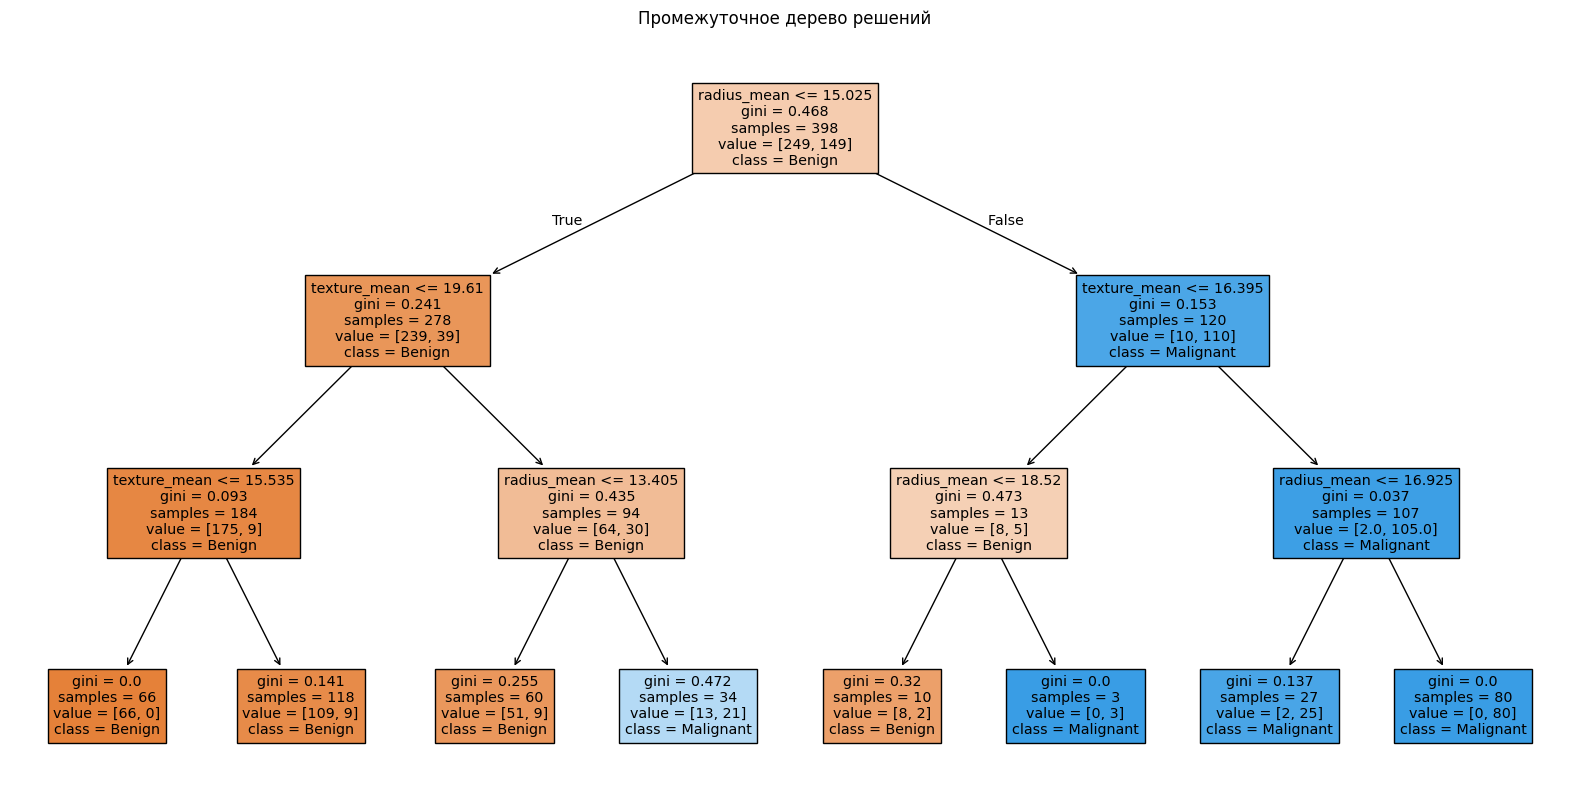

In [14]:
# Задаем параметры max_depth и max_features
intermediate_clf = DecisionTreeClassifier(max_depth=3, max_features=2, random_state=42)
intermediate_clf.fit(X_train, y_train)

# Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(
    intermediate_clf,
    feature_names=["radius_mean", "texture_mean"],  # Признаки, используемые в модели
    class_names=["Benign", "Malignant"],  # Названия классов
    filled=True
)
plt.title("Промежуточное дерево решений")
plt.savefig("intermediate_breast_cancer_tree.png")  # Сохранение дерева
plt.show()


In [7]:
# Построение решающих границ
# Задаем сетку координат
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Предсказания для каждой точки сетки
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


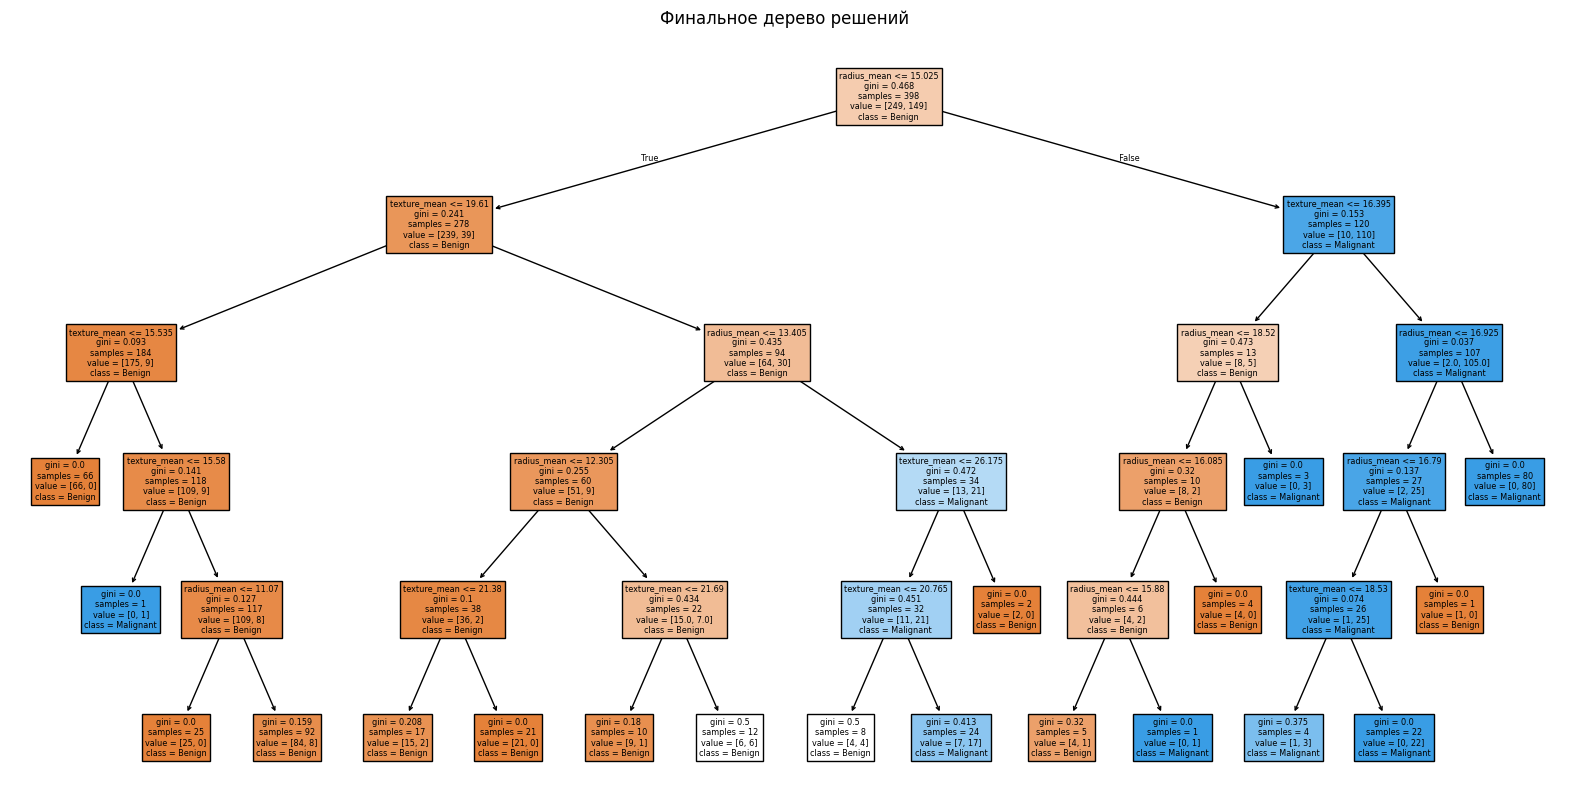

In [15]:
from sklearn.tree import plot_tree

# Обучение финальной модели дерева решений
final_clf = DecisionTreeClassifier(max_depth=5, random_state=42)  # Используем max_depth = 5
final_clf.fit(X_train, y_train)

# Визуализация финального дерева
plt.figure(figsize=(20, 10))
plot_tree(
    final_clf,
    feature_names=["radius_mean", "texture_mean"],  # Имена признаков
    class_names=["Benign", "Malignant"],  # Классы
    filled=True
)
plt.title("Финальное дерево решений")
plt.savefig("final_breast_cancer_tree.png")  # Сохранение в PNG
plt.show()


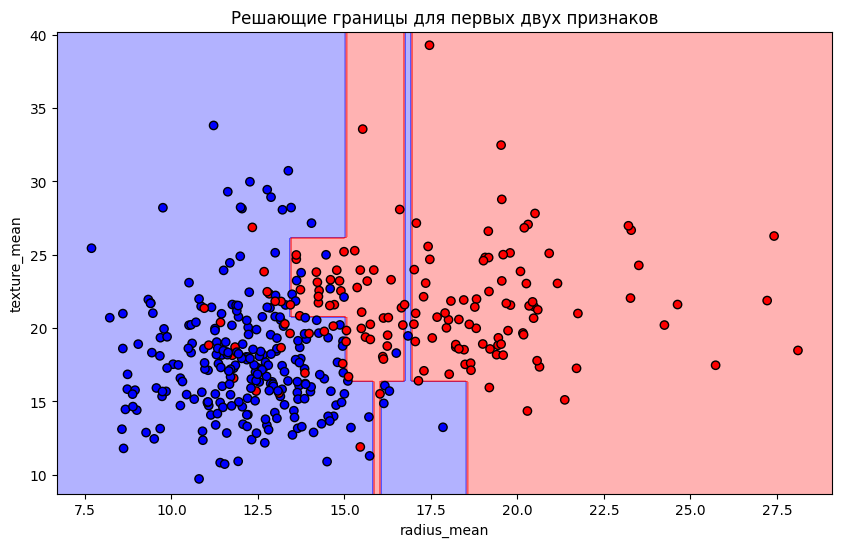

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['blue', 'red']))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap=ListedColormap(['blue', 'red']))
plt.xlabel('radius_mean')  # Первый признак
plt.ylabel('texture_mean')  # Второй признак
plt.title('Решающие границы для первых двух признаков')
plt.show()

Красная область соответствует классу злокачественных опухолей, а синяя область — доброкачественным.
Модель достаточно точно определяет разделение между двумя классами, однако в некоторых областях наблюдаются ошибки классификации (точки красного цвета(злокачественные)  в синей области(доброкачественных)).